In [2]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import sklearn.metrics
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = [16, 12]

In [4]:
# Define constants
N = 15000

In [5]:
# Load all 26D vectors
vectors = np.loadtxt('vectors.txt', delimiter=',', dtype=np.int_)
vectors = vectors[:N]

In [6]:
# Load all IDs
all_ids = [] 
with open('../correct_chains_sorted') as f:
    for line in f:
        pdbid, chainid = line.strip().split(':')
        all_ids.append((pdbid, chainid))
        
all_ids = all_ids[:N]

In [7]:
# Load Q-scores
qscores = np.load('../Results/matrix.npy')
qscores = qscores[:N, :N]

In [8]:
# Load bad vectors ids len(qsco)and get their indices in all_ids
bad_ids = []
with open('bad_chains') as f:
    for line in f:
        pdbid, chainid = line.strip().split()
        bad_ids.append((pdbid, chainid))
        
bad_indices = []
for pair in bad_ids:
    try:
        idx = all_ids.index(pair)
        bad_indices.append(idx)
    except ValueError:
        pass

In [9]:
# Compute pairwise distances between the vectors
distances = sklearn.metrics.pairwise.pairwise_distances(vectors)

In [10]:
#distances2 = sklearn.metrics.pairwise.pairwise_distances(vectors, metric='l1')

In [21]:
from sklearn.manifold import Isomap
pca = Isomap(n_components=2)
reduced = pca.fit_transform(vectors)
distances3 = sklearn.metrics.pairwise_distances(reduced)

In [22]:
# Mask values on the diagonal and with -1 values
masked_qscores = ma.masked_values(qscores[:N, :N], -1)
masked_qscores.mask[:, bad_indices] = 1
masked_qscores.mask[bad_indices, :] = 1
masked_qscores.mask[np.diag_indices(N)] = 1

In [23]:
# Create masked distances
masked_distances = ma.array(distances, mask=masked_qscores.mask)
#masked_distances2 = ma.array(distances2, mask=masked_qscores.mask)
masked_distances3 = ma.array(distances3, mask=masked_qscores.mask)

In [24]:
distances_good = masked_distances[np.triu_indices(N)].compressed()
#distances2_good = masked_distances[np.triu_indices(N)].compressed()
distances3_good = masked_distances[np.triu_indices(N)].compressed()
qscores_good = masked_qscores[np.triu_indices(N)].compressed()

In [15]:
np.corrcoef(qscores_good, distances_good)

array([[ 1.        , -0.42830177],
       [-0.42830177,  1.        ]])

In [25]:
sample = np.random.choice(np.arange(len(distances_good)), 1000000, replace=False)

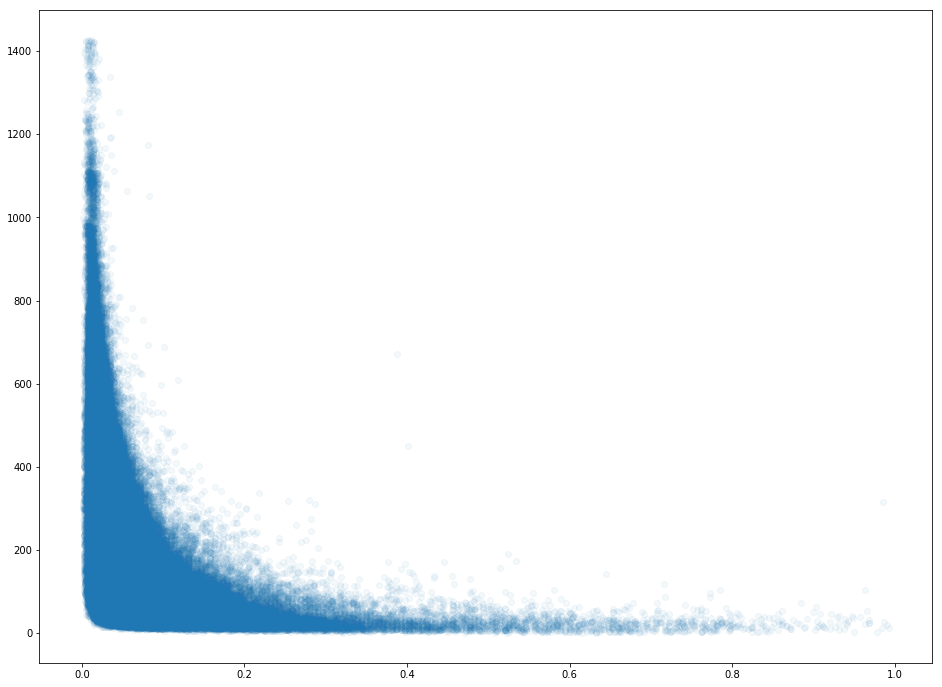

In [26]:
plt.scatter(qscores_good[sample], distances_good[sample], alpha=0.05)

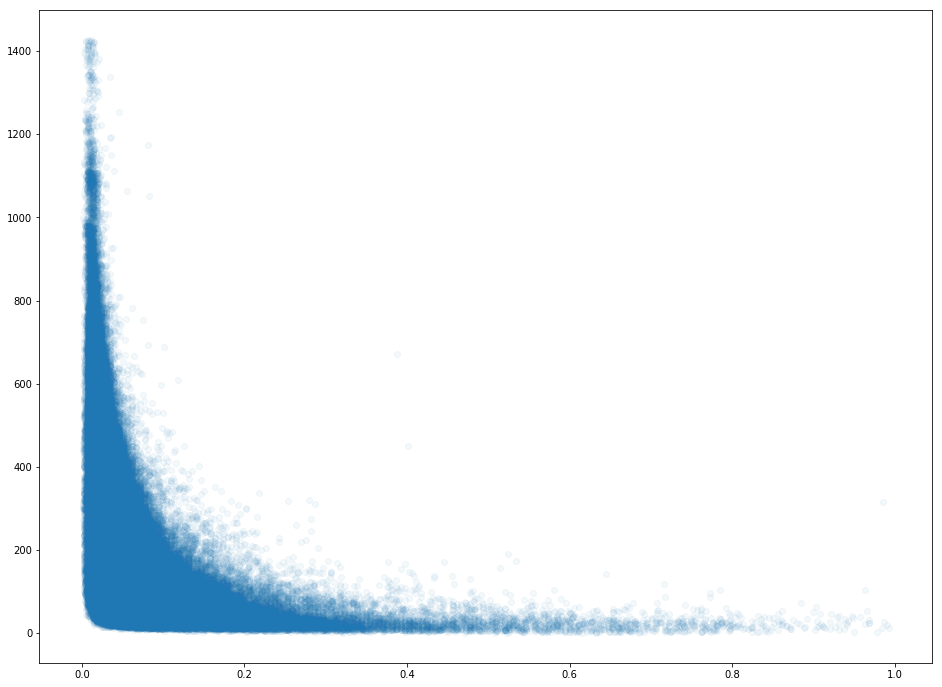

In [27]:
plt.scatter(qscores_good[sample], distances3_good[sample], alpha=0.05)

In [28]:
np.min(distances_good), np.mean(distances_good), np.max(distances_good), np.median(distances_good)

(0.0, 163.20110722842392, 1427.9737392543323, 130.75932089147602)

In [29]:
np.min(qscores_good), np.mean(qscores_good), np.max(qscores_good), np.median(qscores_good)

(0.0, 0.05324003, 1.0, 0.044)